# Here
Data Analysis of Votes data for 39 Art Works rated by 48 participants with 1 to 5 score. 

**work in progress** 


### project

Analyzing and Preparing Data for Learning Algoritms to give user recomendations based on their previous choice

by AnnaKonda (annakonda.guru annakonda.live annakonda.co annakonda.online ) https://github.com/annakoopenu/PeoplePeoplePeople

### about the data

Based on db:
 https://www.kaggle.com/miroslavsabo/paintings
 https://www.kaggle.com/anako2020/paintings-data-exploration
 
 39 Art Works by famous painters 
 Rated by 48 questionary participant's score 1 to 5

using only 3 python's packages
- pandas
- numpy
- matplotlib.pyplot 


# Step 0 - Loading the Data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# data
# paintings.csv

# Create dataframe  
people_file_location = 'paintings.csv'
df_orig = pd.read_csv(people_file_location)

# Step 1 - Data First Overlook

Overlook at the given data, it's volume, columns types and features. 


In [9]:
df_orig.head(7)

NameError: name 'df_orig' is not defined

In [10]:
from matplotlib.cm import summer

art_movements = np.array(df_orig['art movement'].unique())

a = np.array(range(1, len(art_movements)+1)) * 255 / 13
c = [summer(element) for element in a.astype(int)]

art_movement_colors = dict(zip(art_movements, c))

NameError: name 'df_orig' is not defined

In [4]:
fig, ax = plt.subplots(figsize=(5,7))
ax.barh(list(art_movement_colors.keys()), width=0.9, color = list(art_movement_colors.values()))
ax.set_xticks([], minor=False)
ax.tick_params(axis="y",direction="in", pad=-222)
ax.set_title(str(len(art_movement_colors)) + ' Art movements')
fig.show()

NameError: name 'plt' is not defined

48 participants rated 39 paintings of 39 different artists, 3 for each of 13 different art movements.
For example, 'Art Nouveau' movement consists of 3 following paintings by 3 artists: Gustav Klimt, Pierre Bonnard and Alfonz Mucha.


### (1) art piece's rating

In [7]:
df_rating = pd.DataFrame(df_orig)
df_rating = df_rating.set_index('artist')
df_rating = df_rating.drop(columns=['art movement','painting'])
df_rating.head(3)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48
artist,,,,,,,,,,,,,,,,,,,,,
Sandro Botticelli,3,2,3,1,1,1,2,2,3,1,...,2,2,3,2,1,2,2,4,2,2
Leonardo da Vinci,2,2,2,4,1,1,2,3,4,3,...,3,4,4,4,4,1,4,2,2,1
Raphael,1,3,3,1,1,1,5,2,1,2,...,1,1,2,1,1,1,4,3,1,3


In [8]:
# Statistics for votes of 48 voters
df_rating.describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S39,S40,S41,S42,S43,S44,S45,S46,S47,S48
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,2.743590,2.307692,2.564103,2.256410,2.051282,2.102564,2.512821,2.384615,1.897436,2.948718,...,2.589744,2.538462,2.743590,2.794872,3.333333,3.230769,3.102564,3.461538,2.871795,4.051282
std,1.332152,1.320961,1.142363,1.633819,1.431759,1.428928,1.519553,1.205588,1.119090,1.588590,...,1.481783,1.392577,1.332152,1.417550,1.611363,1.441153,1.209499,0.969160,1.301406,1.316869
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,...,1.000000,1.000000,2.000000,1.500000,2.000000,2.000000,2.000000,3.000000,2.000000,3.500000
50%,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,...,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000
75%,4.000000,3.000000,3.000000,4.000000,2.500000,3.000000,3.500000,3.000000,3.000000,5.000000,...,4.000000,3.500000,4.000000,4.000000,5.000000,4.500000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [21]:
mean_rate = round(df_rating.describe().loc['mean'].mean(), 2)
mean_rate

2.81

In [22]:
raitings = df_rating.describe().loc['mean']

In [23]:
#x = np.arange(len(raitings))

In [24]:
raitings = np.sort(raitings)
raitings

array([1.84615385, 1.8974359 , 2.05128205, 2.1025641 , 2.12820513,
       2.25641026, 2.28205128, 2.30769231, 2.38461538, 2.38461538,
       2.41025641, 2.43589744, 2.46153846, 2.51282051, 2.53846154,
       2.56410256, 2.56410256, 2.58974359, 2.64102564, 2.64102564,
       2.64102564, 2.71794872, 2.74358974, 2.74358974, 2.79487179,
       2.80666667, 2.82051282, 2.82051282, 2.84615385, 2.87179487,
       2.87179487, 2.94871795, 2.97435897, 2.97435897, 3.        ,
       3.        , 3.07692308, 3.1025641 , 3.20512821, 3.23076923,
       3.30769231, 3.33333333, 3.46153846, 3.46153846, 3.53846154,
       3.56410256, 3.74358974, 3.87179487, 4.05128205])

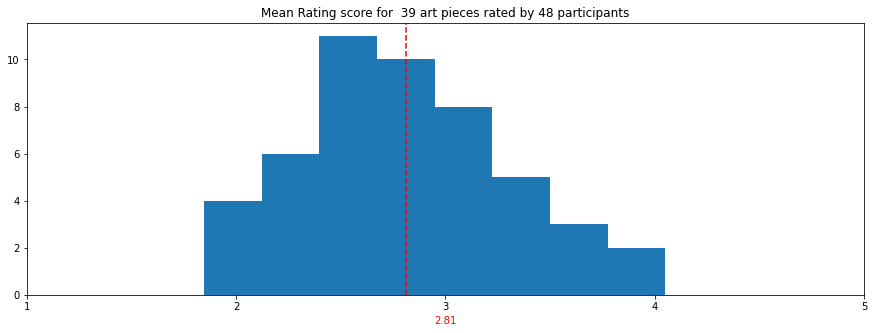

In [25]:
# show histogram for Artist's rating score 
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(raitings, bins = 8)
ax.set_title('Mean Rating score for  ' + str(df_rating.shape[0]) +' art pieces' + ' rated by 48 participants')
ax.set_xticks([1,2,3,4,5])

ax.axvline(mean_rate, ls='--', color='r', label=str(mean_rate))
ax.set_xlabel(str(mean_rate), color='r')

fig.show()

In [26]:
df_rating.head(3)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S40,S41,S42,S43,S44,S45,S46,S47,S48,rating
artist,,,,,,,,,,,,,,,,,,,,,
Francisco Goya,1,2,2,1,1,1,3,3,1,1,...,1,2,1,1,2,3,3,1,5,1.62
Kazimir Malevich,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,4,2,3,2,5,1.79
Diego Velazquez,2,2,2,1,1,1,1,2,1,1,...,1,2,1,1,2,1,4,2,4,1.88


In [27]:
# Mean score of 48 personal votes for Artist-Painting as rating 
for i, row in df_rating.iterrows():
        df_rating.loc[i ,'rating'] = round(row[0:48].mean(), 2) 

In [28]:
df_rating = df_rating.sort_values('rating')
df_rating.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S40,S41,S42,S43,S44,S45,S46,S47,S48,rating
artist,,,,,,,,,,,,,,,,,,,,,
Francisco Goya,1,2,2,1,1,1,3,3,1,1,...,1,2,1,1,2,3,3,1,5,1.62
Kazimir Malevich,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,4,2,3,2,5,1.79
Diego Velazquez,2,2,2,1,1,1,1,2,1,1,...,1,2,1,1,2,1,4,2,4,1.88
Piet Mondrian,3,1,2,1,1,1,1,1,2,1,...,1,1,1,4,1,1,5,3,5,1.98
Gustave Moreau,2,4,2,1,1,2,1,2,1,1,...,1,4,1,1,2,1,3,1,5,2.00


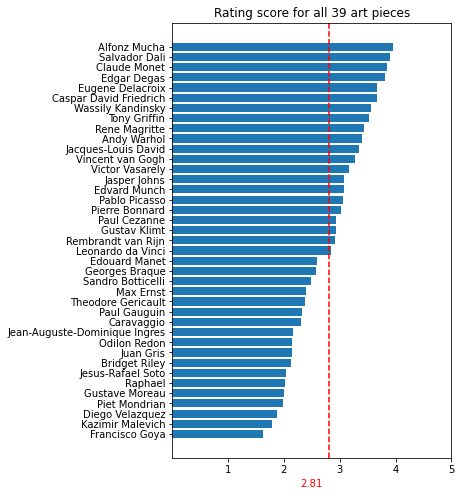

In [29]:
meanx = round(df_rating['rating'].mean(),2)

# show bar diagram for Artist's rating score colored by art movement color
fig, ax = plt.subplots(figsize=(5,8))

ax.barh(df_rating.index, df_rating['rating'])
ax.set_title('Rating score for all ' + str(df_rating.shape[0]) +' art pieces')
ax.set_xticks([1,2,3,4,5])
ax.axvline(meanx, ls='--', color='r', label=str(meanx))
ax.set_xlabel(str(meanx), color='r')

#fig.legend(art_movement_colors.keys())
fig.show()

<AxesSubplot:ylabel='Density'>

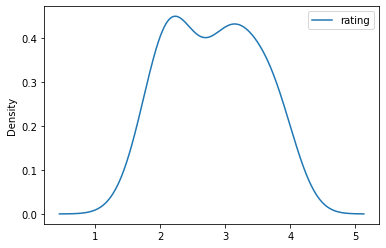

In [30]:
pd.DataFrame(df_rating['rating']).plot(kind='density')

### (2) participant's scores

In [31]:
df_scores = pd.DataFrame(df_rating)
df_scores = df_scores.transpose()
df_scores.head(3)

artist,Francisco Goya,Kazimir Malevich,Diego Velazquez,Piet Mondrian,Gustave Moreau,Raphael,Jesus-Rafael Soto,Bridget Riley,Juan Gris,Odilon Redon,...,Andy Warhol,Rene Magritte,Tony Griffin,Wassily Kandinsky,Caspar David Friedrich,Eugene Delacroix,Edgar Degas,Claude Monet,Salvador Dali,Alfonz Mucha
S1,1.0,1.0,2.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,...,4.0,5.0,2.0,4.0,3.0,3.0,5.0,4.0,4.0,4.0
S2,2.0,1.0,2.0,1.0,4.0,3.0,1.0,1.0,1.0,1.0,...,3.0,2.0,1.0,1.0,2.0,5.0,3.0,4.0,3.0,5.0
S3,2.0,1.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,...,3.0,2.0,1.0,2.0,3.0,5.0,2.0,4.0,4.0,3.0


In [32]:
# Statistics for rates of 39 art pieces
df_scores.describe()

artist,Francisco Goya,Kazimir Malevich,Diego Velazquez,Piet Mondrian,Gustave Moreau,Raphael,Jesus-Rafael Soto,Bridget Riley,Juan Gris,Odilon Redon,...,Andy Warhol,Rene Magritte,Tony Griffin,Wassily Kandinsky,Caspar David Friedrich,Eugene Delacroix,Edgar Degas,Claude Monet,Salvador Dali,Alfonz Mucha
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,1.624898,1.791633,1.875102,1.979184,2.000000,2.020816,2.041633,2.124898,2.145918,2.145918,...,3.395918,3.437551,3.520816,3.562449,3.666735,3.666735,3.812449,3.854082,3.895918,3.958367
std,1.072866,1.322219,1.072866,1.406674,1.207615,1.266386,1.257616,1.252082,1.306866,1.369148,...,1.286785,1.273222,1.527383,1.337072,1.160699,1.328115,1.166481,1.207435,1.262266,1.290322
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [33]:
df_scores.describe().loc['mean'].mean()

2.8066248037676607

Statistical Data for a questionaries S1..S48

S1..S48 columns contains 39 rows of votes at 1 to 5 scale
Each row for an art piece by another painting

In [34]:
# Mean score of 48 personal votes for Artist-Painting as rating 
for i, row in df_scores.iterrows():
        df_scores.loc[i ,'score'] = round(row[0:48].mean(), 2) 

In [35]:
df_scores = df_scores.sort_values('score')
df_scores.head(3)

artist,Francisco Goya,Kazimir Malevich,Diego Velazquez,Piet Mondrian,Gustave Moreau,Raphael,Jesus-Rafael Soto,Bridget Riley,Juan Gris,Odilon Redon,...,Rene Magritte,Tony Griffin,Wassily Kandinsky,Caspar David Friedrich,Eugene Delacroix,Edgar Degas,Claude Monet,Salvador Dali,Alfonz Mucha,score
S21,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.0,2.0,3.0,1.0,4.0,2.0,4.0,5.0,1.0,1.85
S9,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,...,3.0,3.0,1.0,3.0,4.0,4.0,2.0,2.0,4.0,1.90
S5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,...,4.0,1.0,3.0,4.0,2.0,5.0,2.0,5.0,4.0,2.05


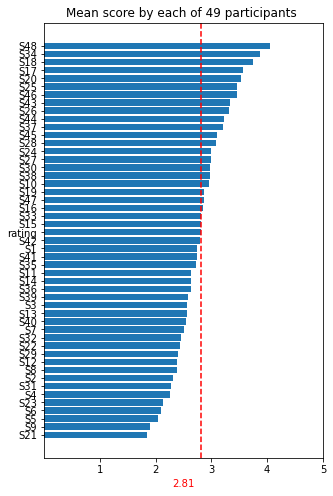

In [36]:
meanx = round(df_scores['score'].mean(),2)

# show bar diagram for Artist's rating score colored by art movement color
fig, ax = plt.subplots(figsize=(5,8))

ax.barh(df_scores.index, df_scores['score'])
ax.set_title('Mean score by each of ' + str(df_scores.shape[0]) +' participants ')
ax.set_xticks([1,2,3,4,5])
ax.axvline(meanx, ls='--', color='r', label=str(meanx))
ax.set_xlabel(str(meanx), color='r')

fig.show()

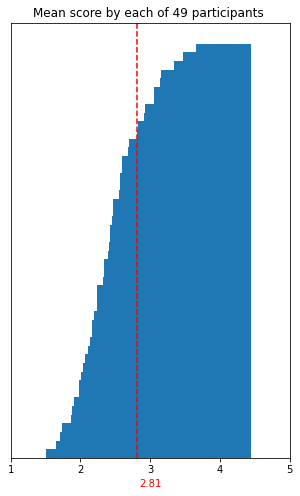

In [37]:
meanx = round(df_scores['score'].mean(),2)

# show bar diagram for Artist's rating score colored by art movement color
fig, ax = plt.subplots(figsize=(5,8))

ax.bar(df_scores['score'], df_scores.index)
ax.set_title('Mean score by each of ' + str(df_scores.shape[0]) +' participants ')
ax.set_xticks([1,2,3,4,5])
ax.set_yticks([])
ax.axvline(meanx, ls='--', color='r', label=str(meanx))
ax.set_xlabel(str(meanx), color='r')

fig.show()

<AxesSubplot:ylabel='Density'>

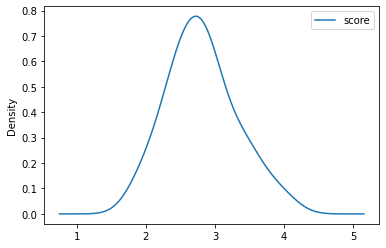

In [38]:
pd.DataFrame(df_scores['score']).plot(kind='density')

------------------------------------------------------------------------------------------------------------------

For binary dession - 2.8 might be used for Like/Dislike dession 

# preliminary conclusions about the data

## next to do:

- fix the problems
- check out for minimum-maximum existing code
- add color = art_movement_colors_list
- add ..

Discrete distribution as horizontal bar chart

https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py

# images have a look

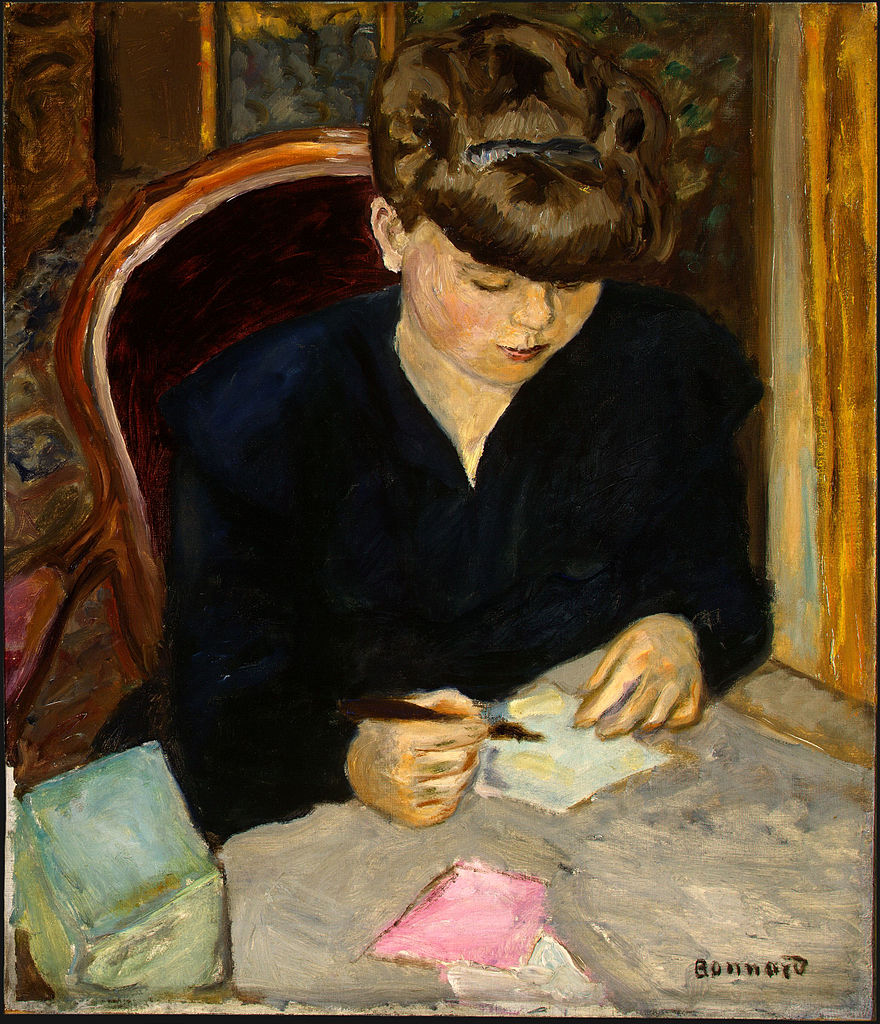

In [39]:
Art_Nouveau__Pierre_Bonnard__The_Letter = 'https://upload.wikimedia.org/wikipedia/commons/d/d0/Pierre_Bonnard_The_Letter.jpg'
Image(Art_Nouveau__Pierre_Bonnard__The_Letter, width = "33%", height = "33%")


In [40]:

# Search google for https://commons.wikimedia.org/wiki/File: Edgar_Degas_The_Dance_Class
# Get as first link : https://commons.wikimedia.org/wiki/File:Edgar_Degas_The_Dance_Class.jpg
# Use this file as link (menu) - File URL - https://upload.wikimedia.org/wikipedia/commons/b/b7/Edgar_Degas_The_Dance_Class.jpg
